In [4]:
import pandas as pd

# 读取生产线 M101 的每日产量统计数据
daili_stats_M101 = pd.read_csv('daily_stats_M101.csv',encoding='gbk')

# 读取生产线 M102 的每日产量统计数据
daili_stats_M102 = pd.read_csv('daily_stats_M102.csv',encoding='gbk')

# 显示前几行数据以确认读取成功
print(daili_stats_M101.head())
print(daili_stats_M102.head())

   新日期  总产品数  合格产品数  不合格产品数       合格率  月份  日期
0  1-1  3462   3453       9  0.997400   1   1
1  1-2  3252   3245       7  0.997847   1   2
2  1-3  3453   3449       4  0.998842   1   3
3  1-4  3466   3461       5  0.998557   1   4
4  1-5  3443   3439       4  0.998838   1   5
   新日期  总产品数  合格产品数  不合格产品数       合格率  月份  日期
0  1-1  3519   3518       1  0.999716   1   1
1  1-2  3319   3318       1  0.999699   1   2
2  1-3  3436   3435       1  0.999709   1   3
3  1-4  3445   3444       1  0.999710   1   4
4  1-5  3363   3362       1  0.999703   1   5


In [ ]:
# 按月份统计 M101 生产线的总产品数
monthly_stats_M101 = daili_stats_M101.groupby('月份')['总产品数'].sum().reset_index()

# 按月份统计 M102 生产线的总产品数
monthly_stats_M102 = daili_stats_M102.groupby('月份')['总产品数'].sum().reset_index()

print(monthly_stats_M101)
print(monthly_stats_M102)
# 这两个数据拿去画2.1

In [9]:
# 2.2  每日，双y轴折线图
# 从daili_stats_M101选取 月份、 日期、产品总数、不合格产品数

M101_daily_defects = daili_stats_M101[['月份', '日期', '不合格产品数']].copy()
M101_daily_defects['不合格率'] = (daili_stats_M101['不合格产品数'] / daili_stats_M101['总产品数']).round(4)
print(M101_daily_defects.head())

# 从daili_stats_M102选取 月份、 日期、产品总数、不合格产品数
M102_daily_defects = daili_stats_M102[['月份', '日期', '不合格产品数']].copy()
M102_daily_defects['不合格率'] = (daili_stats_M102['不合格产品数'] / daili_stats_M102['总产品数']).round(4)
print(M102_daily_defects.head())


   月份  日期  不合格产品数    不合格率
0   1   1       9  0.0026
1   1   2       7  0.0022
2   1   3       4  0.0012
3   1   4       5  0.0014
4   1   5       4  0.0012
   月份  日期  不合格产品数    不合格率
0   1   1       1  0.0003
1   1   2       1  0.0003
2   1   3       1  0.0003
3   1   4       1  0.0003
4   1   5       1  0.0003


In [10]:
M102_daily_defects

,月份,日期,不合格产品数,不合格率
0,1,1,1,0.0003
1,1,2,1,0.0003
2,1,3,1,0.0003
3,1,4,1,0.0003
4,1,5,1,0.0003
...,...,...,...,...
360,12,27,3,0.0009
361,12,28,5,0.0014
362,12,29,3,0.0009
363,12,30,2,0.0006


In [24]:
# pyplot
import matplotlib.pyplot as plt
import numpy
import matplotlib.dates as mdates
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

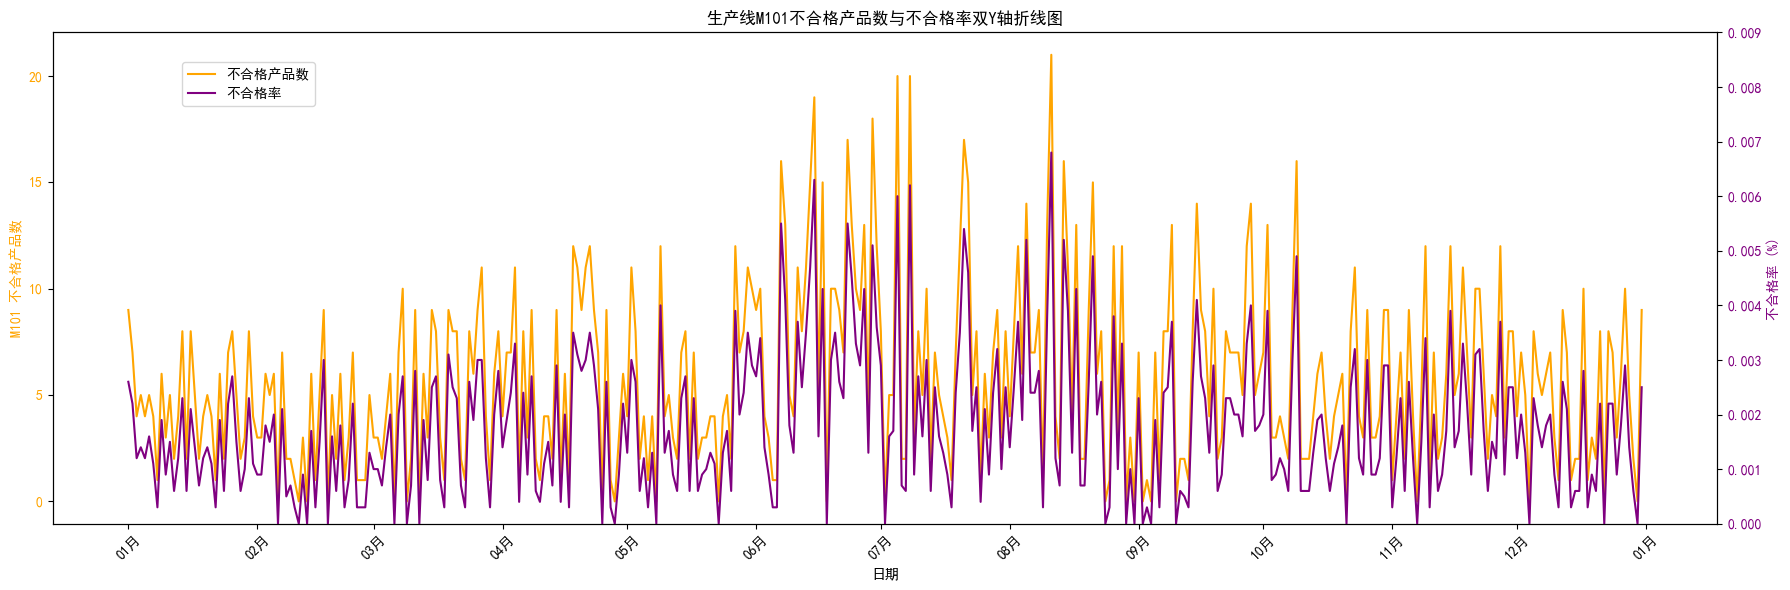

In [25]:
# 绘制双Y轴折线图
fig, ax1 = plt.subplots(figsize=(18, 6))
dates = pd.date_range("2023-01-01", periods=365, freq="D")
# 绘制M101数据（左Y轴）
ax1.plot(dates, M101_daily_defects['不合格产品数'], color='orange', label='不合格产品数', linewidth=1.5)
ax1.set_xlabel('日期')
ax1.set_ylabel('M101 不合格产品数', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# 绘制M102数据（左Y轴）
# ax1.plot(dates, M102_daily_defects['不合格产品数'], color='green', label='M102 不合格产品数', linewidth=1.5)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m月'))
plt.xticks(rotation=45)
# 创建右Y轴并绘制不合格率
ax2 = ax1.twinx()
ax2.plot(dates, M101_daily_defects['不合格率'], color='purple', linestyle='-', label='不合格率', linewidth=1.5)
# ax2.plot(dates, M102_daily_defects['不合格率'], color='orange', linestyle='--', label='M102 不合格率', linewidth=1.5)
ax2.set_ylabel('不合格率 (%)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 0.009)  # 不合格率的范围

# 添加图例
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# 显示图像
plt.title("生产线M101不合格产品数与不合格率双Y轴折线图")
plt.tight_layout()
plt.show()

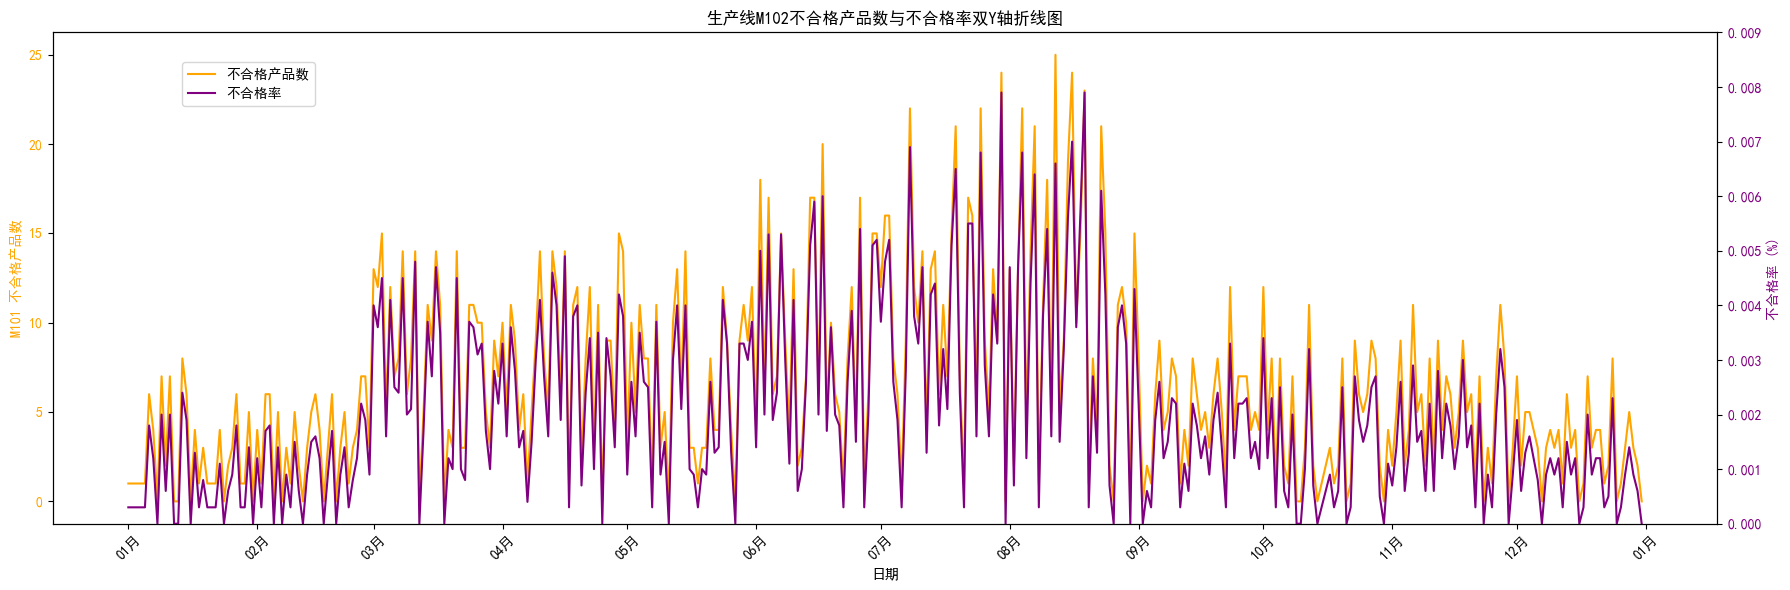

In [29]:
# 绘制双Y轴折线图
fig, ax1 = plt.subplots(figsize=(18, 6))
dates = pd.date_range("2023-01-01", periods=365, freq="D")
# 绘制M101数据（左Y轴）
# ax1.plot(dates, M101_daily_defects['不合格产品数'], color='orange', label='不合格产品数', linewidth=1.5)
ax1.set_xlabel('日期')
ax1.set_ylabel('M101 不合格产品数', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# 绘制M102数据（左Y轴）
ax1.plot(dates, M102_daily_defects['不合格产品数'], color='orange', label='不合格产品数', linewidth=1.5)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m月'))
plt.xticks(rotation=45)
# 创建右Y轴并绘制不合格率
ax2 = ax1.twinx()
# ax2.plot(dates, M101_daily_defects['不合格率'], color='purple', linestyle='-', label='不合格率', linewidth=1.5)
ax2.plot(dates, M102_daily_defects['不合格率'], color='purple', linestyle='-', label='不合格率', linewidth=1.5)
ax2.set_ylabel('不合格率 (%)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 0.009)  # 不合格率的范围

# 添加图例
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# 显示图像
plt.title("生产线M102不合格产品数与不合格率双Y轴折线图")
plt.tight_layout()
plt.show()

In [30]:
# 读入两个年故障汇总记录
M101_allyear_faults = pd.read_csv('M101年故障汇总记录.csv',encoding='gbk')
M102_allyear_faults = pd.read_csv('M102年故障汇总记录.csv',encoding='gbk')
print(M101_allyear_faults)
print(M102_allyear_faults)

  故障类别   总次数  平均持续时长   发生频率
0   A1   240  473.03   0.66
1   A2  2335  540.31   6.40
2   A3   319  727.61   0.87
3   A4   826  737.83   2.26
4   汇总  3720  595.89  10.19
  故障类别   总次数  平均持续时长   发生频率
0   A1   217  467.86   0.59
1   A2  2263  540.52   6.20
2   A3   318  726.33   0.87
3   A4   852  744.40   2.33
4   汇总  3650  599.98  10.00


In [31]:
# 读取M101故障记录
M101_faults = pd.read_csv('M101故障记录.csv',encoding='gbk')
# 读取M102故障记录
M102_faults = pd.read_csv('M102故障记录.csv',encoding='gbk')

In [32]:
M101_faults 

,月份,日期,故障类别,开始时间,结束时间,持续时间
0,1,1,A2,4549,5231,682
1,1,1,A2,7668,8194,526
2,1,1,A2,9476,10114,638
3,1,1,A2,11935,12648,713
4,1,1,A2,16520,16879,359
...,...,...,...,...,...,...
3715,12,31,A2,7593,7971,378
3716,12,31,A2,9400,9984,584
3717,12,31,A2,15536,15981,445
3718,12,31,A2,21645,22235,590


In [ ]:
# 对M101_faults按故障类型进行分组统计，提取全部故障类别A1的数据
M101_A1 = M101_faults[M101_faults['故障类别'] == 'A1']

# M101_A2
M101_A2 = M101_faults[M101_faults['故障类别'] == 'A2']

# M101_A3 和 A4
M101_A3 = M101_faults[M101_faults['故障类别'] == 'A3']

M101_A4 = M101_faults[M101_faults['故障类别'] == 'A4']


      月份  日期 故障类别   开始时间   结束时间  持续时间
5      1   1   A1  20227  20753   526
26     1   3   A1  27687  28046   359
35     1   5   A1   2212   2729   517
47     1   6   A1  11669  12251   582
71     1   9   A1   6883   7252   369
...   ..  ..  ...    ...    ...   ...
3644  12  22   A1  16977  17502   525
3659  12  24   A1  20253  20760   507
3670  12  25   A1  27292  27798   506
3687  12  28   A1   3185   3664   479
3701  12  29   A1  19754  20264   510

[240 rows x 6 columns]
      月份  日期 故障类别   开始时间   结束时间  持续时间
0      1   1   A2   4549   5231   682
1      1   1   A2   7668   8194   526
2      1   1   A2   9476  10114   638
3      1   1   A2  11935  12648   713
4      1   1   A2  16520  16879   359
...   ..  ..  ...    ...    ...   ...
3715  12  31   A2   7593   7971   378
3716  12  31   A2   9400   9984   584
3717  12  31   A2  15536  15981   445
3718  12  31   A2  21645  22235   590
3719  12  31   A2  23559  24084   525

[2335 rows x 6 columns]
      月份  日期 故障类别   开始时间   结束时间  持续时间
1

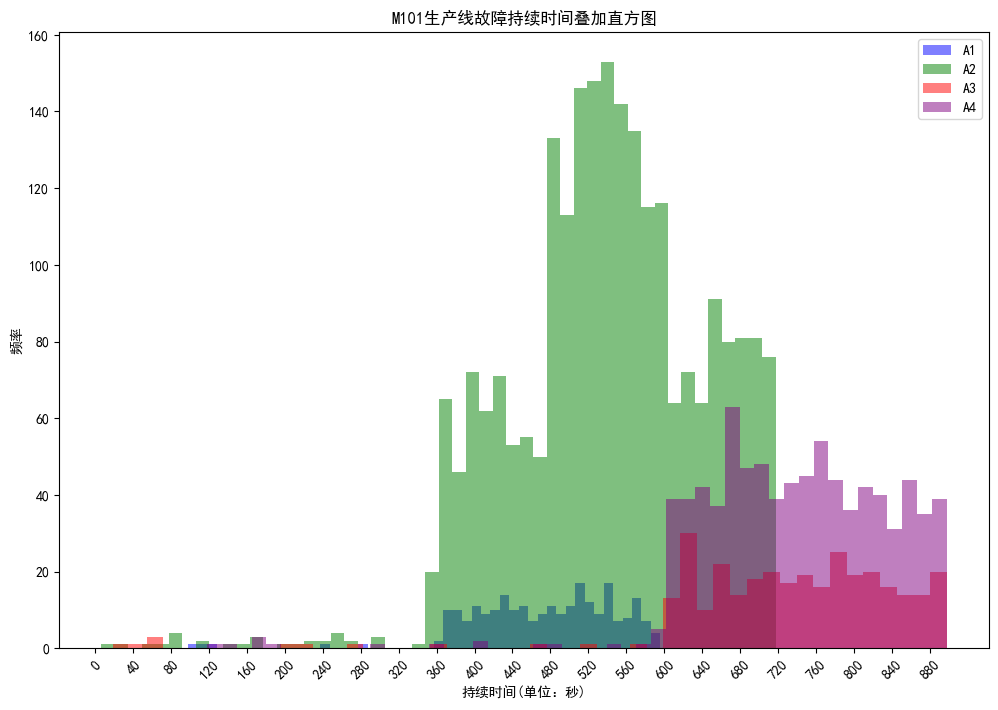

In [47]:
# 绘制叠加直方图
plt.figure(figsize=(12, 8))

# 绘制A1故障的持续时间直方图
plt.hist(M101_A1['持续时间'], bins=50, alpha=0.5, label='A1', color='blue')

# 绘制A2故障的持续时间直方图
plt.hist(M101_A2['持续时间'], bins=50, alpha=0.5, label='A2', color='green')

# 绘制A3故障的持续时间直方图
plt.hist(M101_A3['持续时间'], bins=50, alpha=0.5, label='A3', color='red')

# 绘制A4故障的持续时间直方图
plt.hist(M101_A4['持续时间'], bins=50, alpha=0.5, label='A4', color='purple')

# 添加图例
plt.legend(loc='upper right')

# 添加标题和标签
plt.title('M101生产线故障持续时间叠加直方图')
plt.xlabel('持续时间(单位：秒)')
plt.ylabel('频率')

plt.xticks(range(0, int(max(M101_A1['持续时间'].max(), M101_A2['持续时间'].max(), M101_A3['持续时间'].max(), M101_A4['持续时间'].max()) + 10), 40), rotation=45)

# 显示图像
plt.show()

In [45]:
# 对M102_faults按故障类型进行分组统计，提取全部故障类别A1的数据
M102_A1 = M102_faults[M102_faults['故障类别'] == 'A1']

# M102_A2
M102_A2 = M102_faults[M102_faults['故障类别'] == 'A2']

# M102_A3 和 A4
M102_A3 = M102_faults[M102_faults['故障类别'] == 'A3']

M102_A4 = M102_faults[M102_faults['故障类别'] == 'A4']

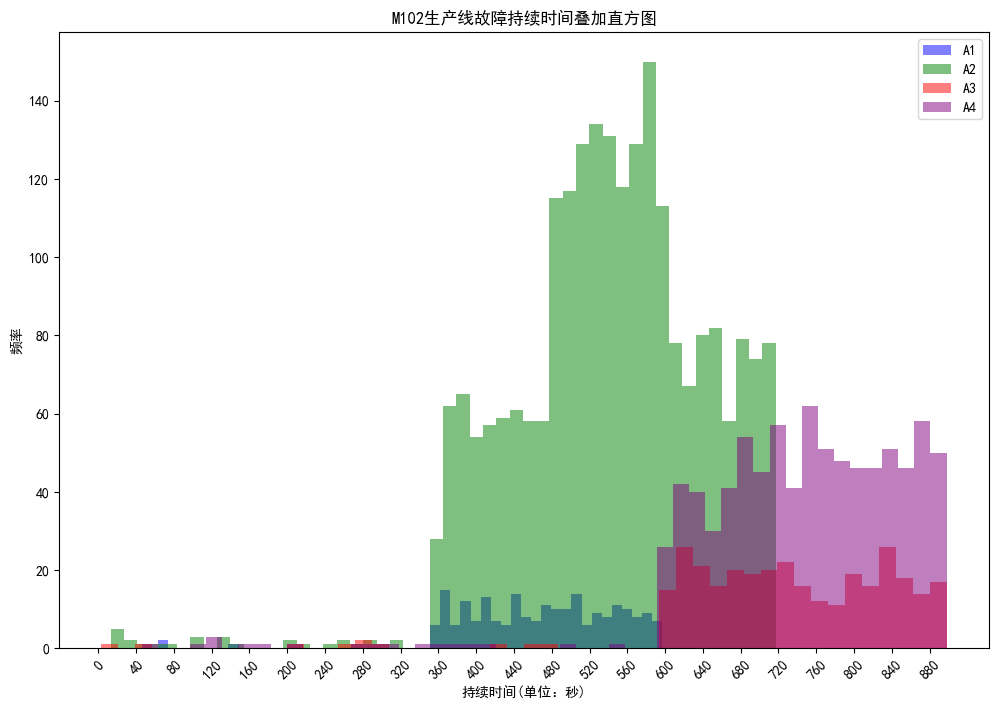

In [46]:
# 绘制叠加直方图
plt.figure(figsize=(12, 8))

# 绘制A1故障的持续时间直方图
plt.hist(M102_A1['持续时间'], bins=50, alpha=0.5, label='A1', color='blue')

# 绘制A2故障的持续时间直方图
plt.hist(M102_A2['持续时间'], bins=50, alpha=0.5, label='A2', color='green')

# 绘制A3故障的持续时间直方图
plt.hist(M102_A3['持续时间'], bins=50, alpha=0.5, label='A3', color='red')

# 绘制A4故障的持续时间直方图
plt.hist(M102_A4['持续时间'], bins=50, alpha=0.5, label='A4', color='purple')

# 添加图例
plt.legend(loc='upper right')

# 添加标题和标签
plt.title('M102生产线故障持续时间叠加直方图')
plt.xlabel('持续时间(单位：秒)')
plt.ylabel('频率')

plt.xticks(range(0, int(max(M102_A1['持续时间'].max(), M102_A2['持续时间'].max(), M102_A3['持续时间'].max(), M102_A4['持续时间'].max()) + 10), 40), rotation=45)

# 显示图像
plt.show()